In [209]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


# Import required libraries

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Preparation and Cleaning

# Read the file into pandas dataframe

In [211]:
df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")

In [212]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [213]:
df.tail(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7728384,A-7777752,Source1,2,2019-08-23 17:42:27,2019-08-23 18:11:10,34.064460,-118.003880,34.065330,-117.997150,0.390,...,False,False,False,False,False,False,Day,Day,Day,Day
7728385,A-7777753,Source1,2,2019-08-23 17:40:12,2019-08-23 18:08:35,33.943599,-117.077880,33.943599,-117.077880,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
7728386,A-7777754,Source1,2,2019-08-23 17:40:12,2019-08-23 18:08:35,34.261030,-119.228000,34.262390,-119.230870,0.189,...,False,False,False,False,False,False,Day,Day,Day,Day
7728387,A-7777755,Source1,2,2019-08-23 17:43:56,2019-08-23 18:12:27,33.741700,-117.837090,33.739170,-117.830010,0.443,...,False,False,False,False,False,False,Day,Day,Day,Day
7728388,A-7777756,Source1,2,2019-08-23 18:30:23,2019-08-23 18:58:54,34.239104,-118.416176,34.239104,-118.416176,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day
7728393,A-7777761,Source1,2,2019-08-23 18:52:06,2019-08-23 19:21:31,34.133930,-117.230920,34.137360,-117.239340,0.537,...,False,False,False,False,False,False,Day,Day,Day,Day


In [214]:
df.ndim

2

In [215]:
df.shape

(7728394, 46)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [217]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


In [218]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [219]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print()
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 26 numerical features: ['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

We have 20 categorical features: ['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [220]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
print(len(numeric_df.columns))
print(numeric_df.columns)

13
Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')


In [221]:
Missing_values_Percentage = df.isna().sum().sort_values(ascending=False)/len(df)

In [222]:
Missing_values_Percentage

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

<Axes: >

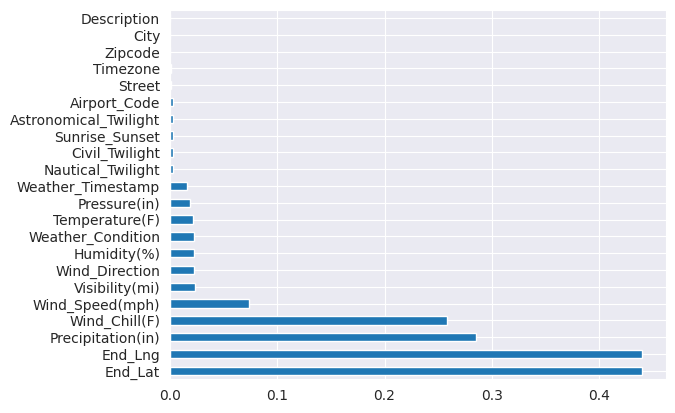

In [223]:
Missing_values_Percentage[Missing_values_Percentage != 0].plot(kind='barh')

# Exploratory Data Analysis & Visualization

# City & State

How Many US cities are there in the dataset?

In [224]:
No_Of_Cities = df['City'].nunique()
No_Of_Cities

13678

In [225]:
Cities_By_Accidents = df.City.value_counts()
Cities_By_Accidents[:10]

City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Orlando        109733
Austin          97359
Raleigh         86079
Nashville       72930
Baton Rouge     71588
Name: count, dtype: int64

**New york being the most populated city why it did not show up in the top 10 cities by accidents ?**

In [226]:
# let us check wheather NewYork State is there in dataset or not
NewYork_State = df['State']=='NY'
NewYork_State.value_counts()

State
False    7380434
True      347960
Name: count, dtype: int64

In [227]:
NewYork_City =df['City']=='New York'

NewYork_City.value_counts()

City
False    7706695
True       21699
Name: count, dtype: int64

In [228]:
df.State.nunique()

49

In [229]:
df.State.value_counts()

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64

**Even Though the NewYork City is listed in the dataset why NewYork City has less Accidents being a most populated City?**

In [230]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [231]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

#### Dropping the rows in which entries are NaT (Not a Time).

In [232]:
df = df.dropna(subset=['Start_Time'])


In [233]:
ny_data = df[df['City'] == 'New York']

In [234]:
ny_data['Year'] = ny_data['Start_Time'].dt.year

In [235]:
earliest_year = ny_data['Year'].min()
print(f"The data for the city 'New York' starts from the year {earliest_year}.")

The data for the city 'New York' starts from the year 2016.


In [236]:
latest_year = ny_data['Year'].max()
print(f"The data for the city 'New York' ends in the year {latest_year}.")

The data for the city 'New York' ends in the year 2023.


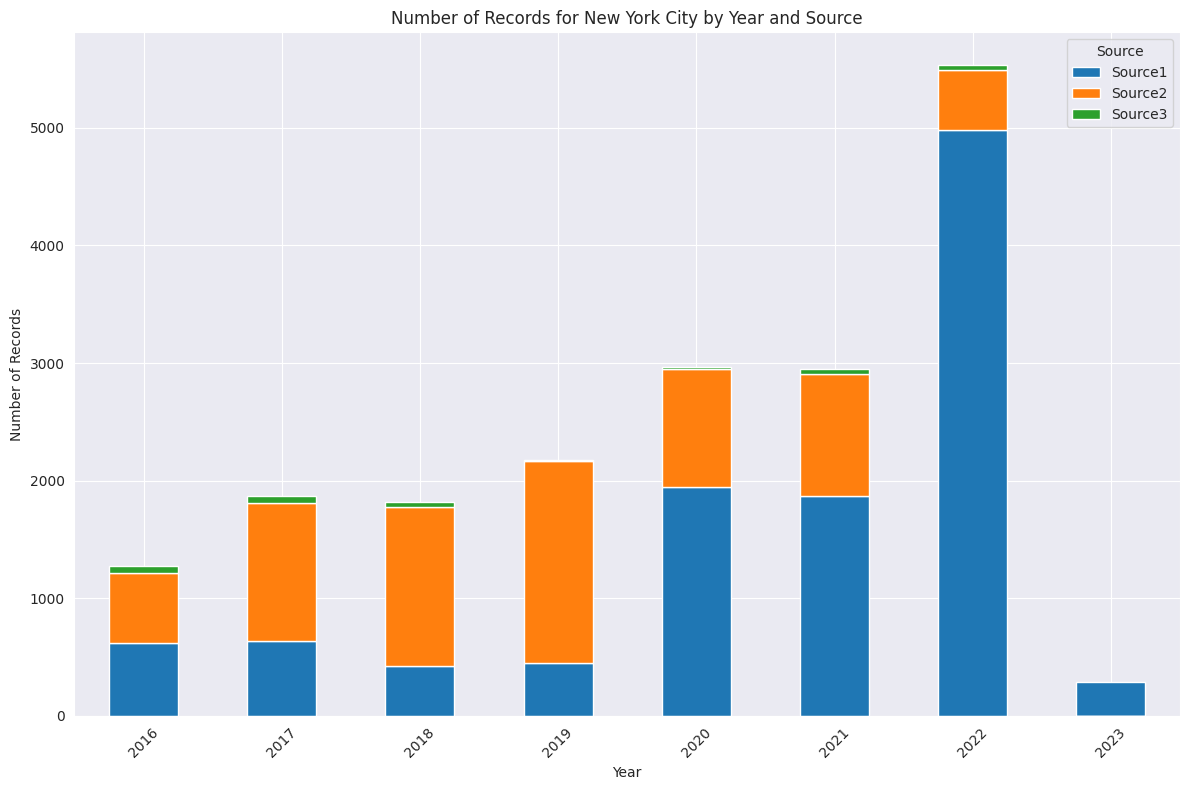

In [237]:
ny_yearly_source_counts = ny_data.groupby(['Year', 'Source']).size().unstack(fill_value=0)
ny_yearly_source_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Number of Records for New York City by Year and Source')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.legend(title='Source')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Maybe the sources did not collect the data properly for the NewYork City this might be the possible reason for NY city having less number of accidents & not appearing on the top of the list.***

#### The number of motor vehicle collisions reported citywide is as follows: 2020: 110,858. 2021: 108,211. 2022: 100,511
(Source:https://www.rosenbaumnylaw.com/new-york-car-accident-lawyer/statistics/)

**There are 50 States in US which of the state accidents data is not collected?**

In [238]:
State_Not_listed = df['State'] == 'HI'
State_Not_listed.value_counts()

State
False    6985228
Name: count, dtype: int64

* **So Hawaii State Accidents data is not collected**
* Hawaii is 11th Least Populas State 

In [239]:
Cities_By_Accidents = df.City.value_counts()
Cities_By_Accidents[:10]

City
Houston        159960
Miami          156542
Los Angeles    142452
Charlotte      130532
Dallas         120981
Orlando         93618
Austin          92024
Raleigh         79489
Nashville       67107
Baton Rouge     66036
Name: count, dtype: int64

### What are the top 20 Cities by Accidents?

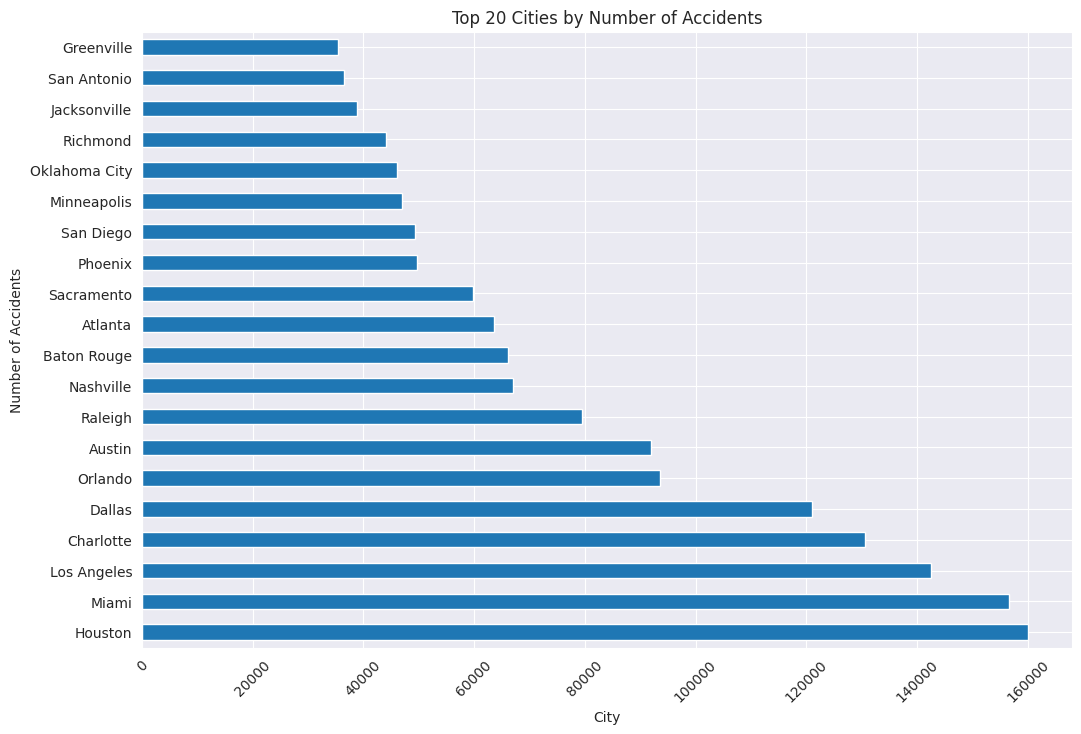

In [240]:
plt.figure(figsize=(12, 8))
Cities_By_Accidents[:20].plot(kind='barh')
plt.title('Top 20 Cities by Number of Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

### What are the top 10 States by Accidents?

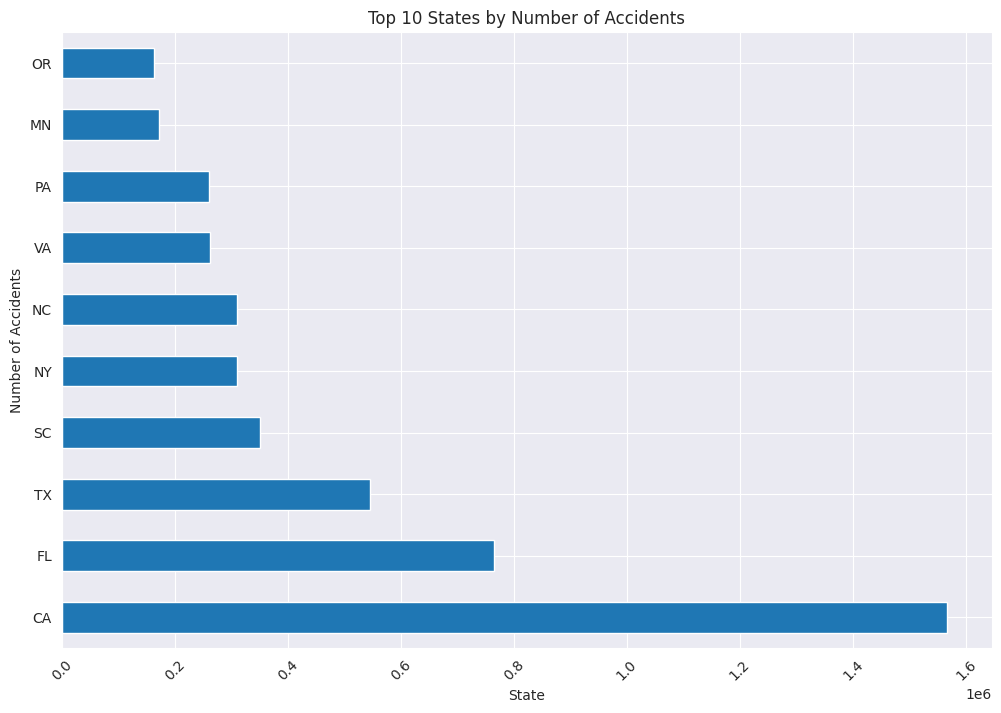

In [241]:
States_By_Accidents = df.State.value_counts()
States_By_Accidents[:10]
plt.figure(figsize=(12, 8))
States_By_Accidents[:10].plot(kind='barh')
plt.title('Top 10 States by Number of Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

### Distribution of cities by accidents

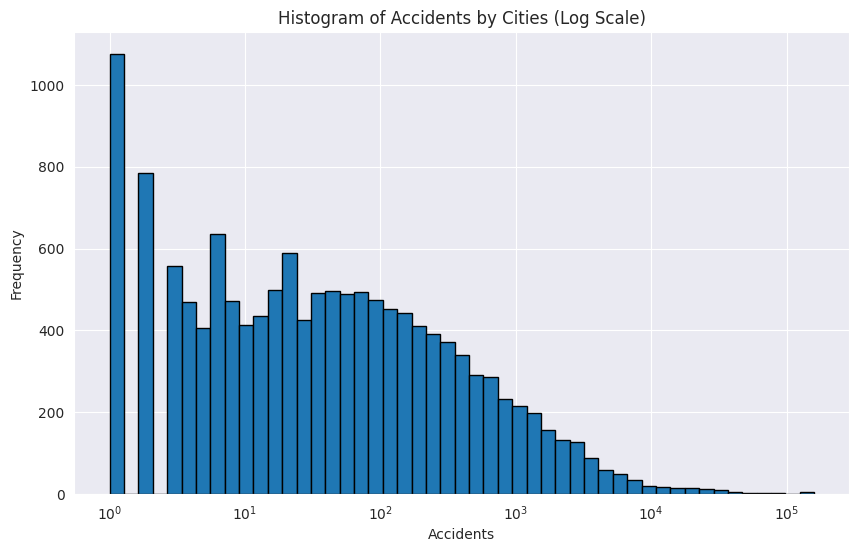

In [242]:
log_bins = np.logspace(np.log10(min(Cities_By_Accidents)), np.log10(max(Cities_By_Accidents)), 50)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(Cities_By_Accidents, bins=log_bins, edgecolor='black')

# Setting logarithmic scale on x-axis
plt.xscale('log')

# Adding labels and title
plt.xlabel('Accidents')
plt.ylabel('Frequency')
plt.title('Histogram of Accidents by Cities (Log Scale)')

# Display the plot
plt.show()

In [243]:
Low_Accidents = Cities_By_Accidents[Cities_By_Accidents<=1000]
Low_Accidents

City
Hercules                        999
Fishkill                        998
Clackamas                       995
Toms River                      995
Brandywine                      994
                               ... 
Elfrida                           1
Jachin                            1
Suches                            1
Brandamore                        1
American Fork-Pleasant Grove      1
Name: count, Length: 12478, dtype: int64

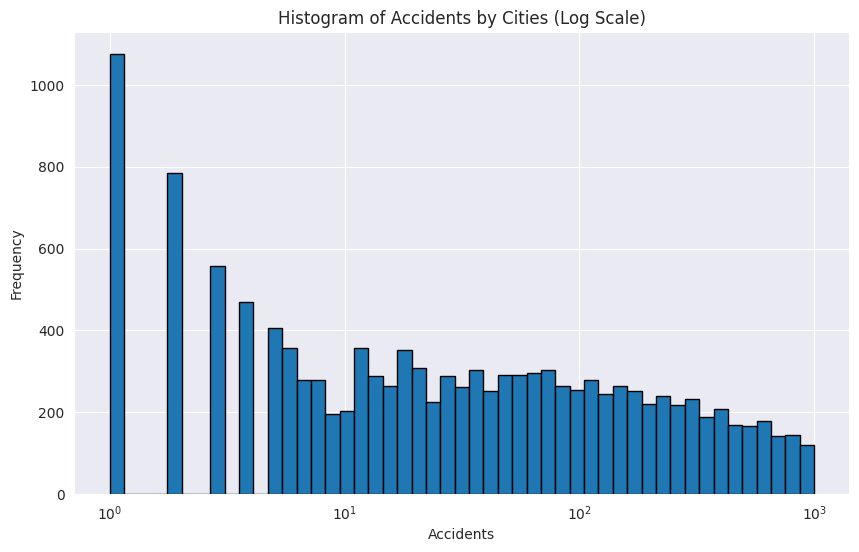

In [244]:
log_bins = np.logspace(np.log10(min(Low_Accidents)), np.log10(max(Low_Accidents)), 50)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(Low_Accidents, bins=log_bins, edgecolor='black')

# Setting logarithmic scale on x-axis
plt.xscale('log')

# Adding labels and title
plt.xlabel('Accidents')
plt.ylabel('Frequency')
plt.title('Histogram of Accidents by Cities (Log Scale)')

# Display the plot
plt.show()

In [245]:
High_Accidents = Cities_By_Accidents[Cities_By_Accidents>1000]
High_Accidents

City
Houston          159960
Miami            156542
Los Angeles      142452
Charlotte        130532
Dallas           120981
                  ...  
East Elmhurst      1008
Woodburn           1003
Jordan Valley      1002
Harrison           1002
Rosamond           1001
Name: count, Length: 1122, dtype: int64

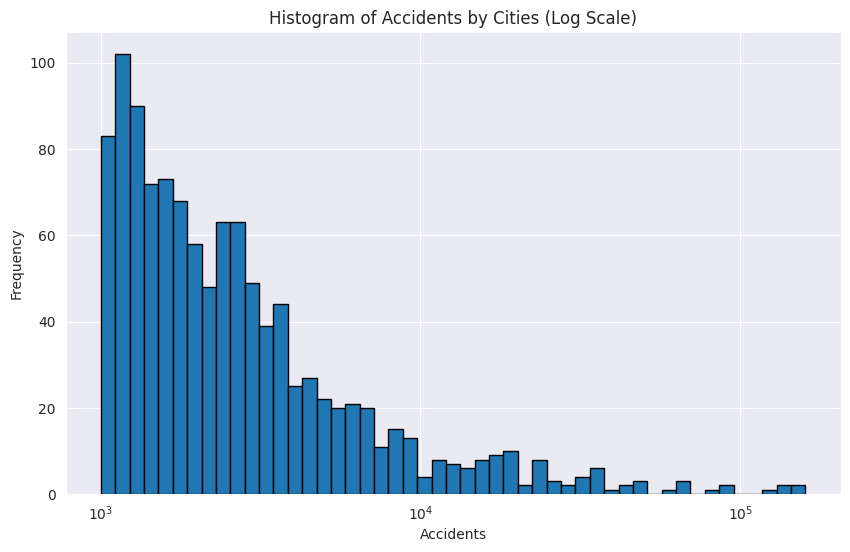

In [246]:
log_bins = np.logspace(np.log10(min(High_Accidents)), np.log10(max(High_Accidents)), 50)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(High_Accidents, bins=log_bins, edgecolor='black')

# Setting logarithmic scale on x-axis
plt.xscale('log')

# Adding labels and title
plt.xlabel('Accidents')
plt.ylabel('Frequency')
plt.title('Histogram of Accidents by Cities (Log Scale)')

# Display the plot
plt.show()

In [247]:
Per_low_Accident_Cities = len(Low_Accidents)/No_Of_Cities
Per_low_Accident_Cities

0.9122678754203831

In [248]:
Per_High_Accident_Cities = len(High_Accidents)/(No_Of_Cities)
Per_High_Accident_Cities

0.0820295364819418

* **The observed exponential decrease in accidents across the distributions warrants further investigation to understand the underlying causes**
* 8% of the cities have more than 1000 accidents

## Accident Factors('Bump','Roundabout','Traffic_signal')

**What is the percentage of accidents with different accident factors?**

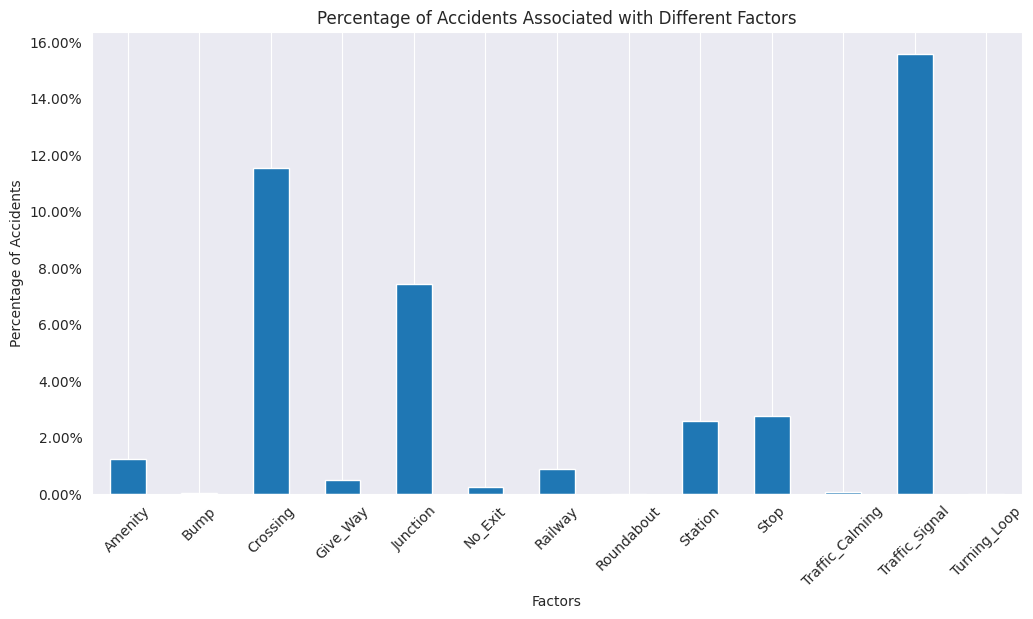

In [249]:
# List of boolean columns
bool_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
                'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                'Traffic_Signal', 'Turning_Loop']

# Sum the True values in each column to get the count of accidents
accident_factors = df[bool_columns].sum()

# Calculate the percentage of accidents for each factor
total_accidents = len(df)
accident_factors_percentage = (accident_factors / total_accidents) * 100

# Plot the data
plt.figure(figsize=(12, 6))
accident_factors_percentage.plot(kind='bar')
plt.title('Percentage of Accidents Associated with Different Factors')
plt.xlabel('Factors')
plt.ylabel('Percentage of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}%'))

# Show the plot
plt.show()


* Factors such as 'Amenity', 'Bump', 'Give_Way', 'No_Exit', 'Railway', 'Roundabout', 'Traffic_Calming', and 'Turning_Loop' have a negligible effect on accidents, each accounting for less than 2% of the total accidents.
* Factors like 'Station' and 'Stop' have a moderate impact, contributing to between 2% and 4% of the total accidents.
* More significant factors include 'Junction' (7%), 'Crossing' (11%), and 'Traffic Signal' (15%).
* Human error at junctions and crossings, such as misjudging oncoming traffic, failing to yield, and not adhering to signals, often contributes to accidents, exacerbated by poor visibility and inadequate signage. Traffic signal-related accidents are frequently caused by drivers running red lights, making sudden stops, or speeding to beat the light.

In [250]:
Traffic_signal_Per=df['Traffic_Signal'].value_counts()/len(df)
Traffic_signal_Per

Traffic_Signal
False    0.844214
True     0.155786
Name: count, dtype: float64

In [251]:
Crossing=df['Crossing'].value_counts()/len(df)
Crossing

Crossing
False    0.884325
True     0.115675
Name: count, dtype: float64

## Temperature

**Does the accidents are occuring in hottest temperature or coolest temperature?**

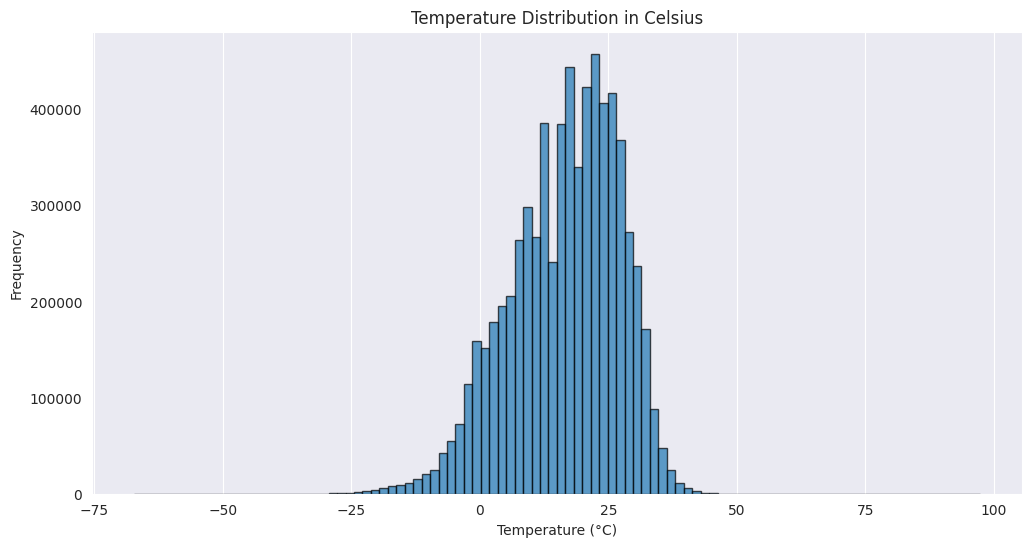

In [252]:

    # Convert the temperature from Fahrenheit to Celsius
    df['Temperature(C)'] = (df['Temperature(F)'] - 32) * 5.0/9.0

    # Plot the temperature data
    plt.figure(figsize=(12, 6))
    plt.hist(df['Temperature(C)'], bins=100, edgecolor='k', alpha=0.7)
    plt.title('Temperature Distribution in Celsius')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Frequency')
    plt.grid(axis='y')

    # Show the plot
    plt.show()


In [253]:
Temperature =  df['Temperature(C)'].value_counts().head(10)
Temperature


Temperature(C)
25.000000    154454
22.777778    153773
20.000000    148719
22.222222    144102
23.888889    142459
21.111111    139671
15.000000    135812
17.222222    135219
17.777778    133952
26.111111    130945
Name: count, dtype: int64

* Accidents occurring between 15°C to 25°C are influenced by drivers' complacency in comfortable weather conditions, resulting in distractions and relaxed driving habits. Additionally, the higher traffic volume and variable road conditions within this range contribute to increased accident rates due to congestion and unpredictable road surfaces.

### Start Time

In [254]:
df.Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 6985228, dtype: datetime64[ns]

**What time of the day are accidents most frequent in?**

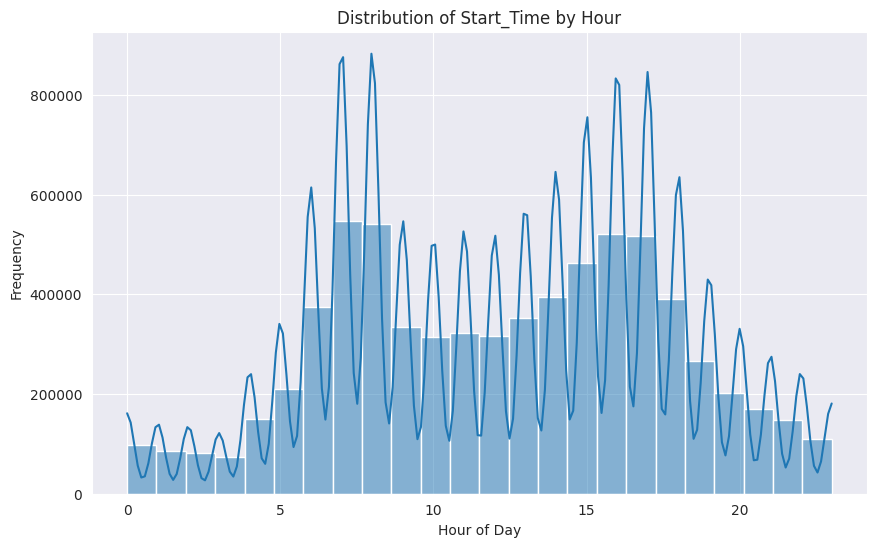

In [255]:
# Extract hour from Start_Time
df['Hour'] = df['Start_Time'].dt.hour

# Plotting histogram or distplot
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=24, kde=True)  # kde=True for distplot
plt.title('Distribution of Start_Time by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

* Accidents are more likely to occur between 7:00 AM and 10:00 AM, corresponding to the morning rush hour when people depart for work. Similarly, another peak period for accidents is between 3:00 PM and 7:00 PM, coinciding with the evening rush hour when commuters return home from work. 
* These times highlight critical periods of heightened traffic activity and potentially distracted driving, necessitating focused road safety measures during peak commuting hours.

**Which days of the week have the most accidents?**

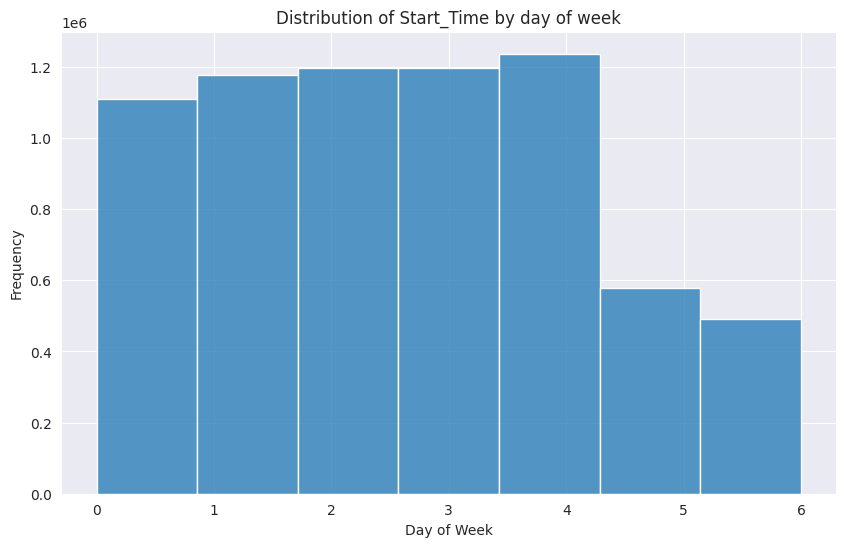

In [256]:
# Extract hour from Start_Time
df['Day_of_Week'] = df['Start_Time'].dt.dayofweek

# Plotting histogram or distplot
plt.figure(figsize=(10, 6))
sns.histplot(df['Day_of_Week'], bins=7, kde=False)  # kde=True for distplot
plt.title('Distribution of Start_Time by day of week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.show()

* On weekends the accidents are very less when compared with the week days/ Working days

**Let us check if the distribution of hours follow same on the weekends and working days**

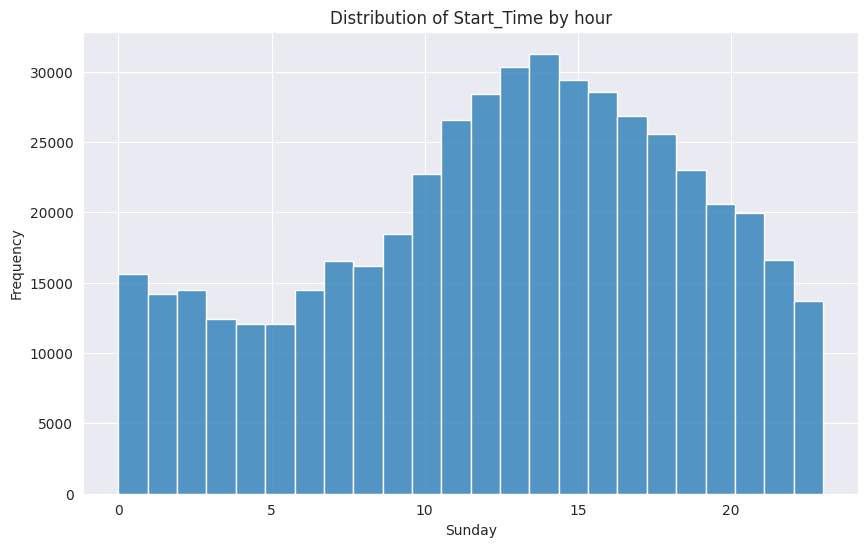

In [257]:
df['Sunday'] = df.Start_Time[df['Start_Time'].dt.dayofweek==6].dt.hour

# Plotting histogram or distplot
plt.figure(figsize=(10, 6))
sns.histplot(df['Sunday'], bins=24, kde=False)  # kde=True for distplot
plt.title('Distribution of Start_Time by hour')
plt.xlabel('Sunday')
plt.ylabel('Frequency')
plt.show()

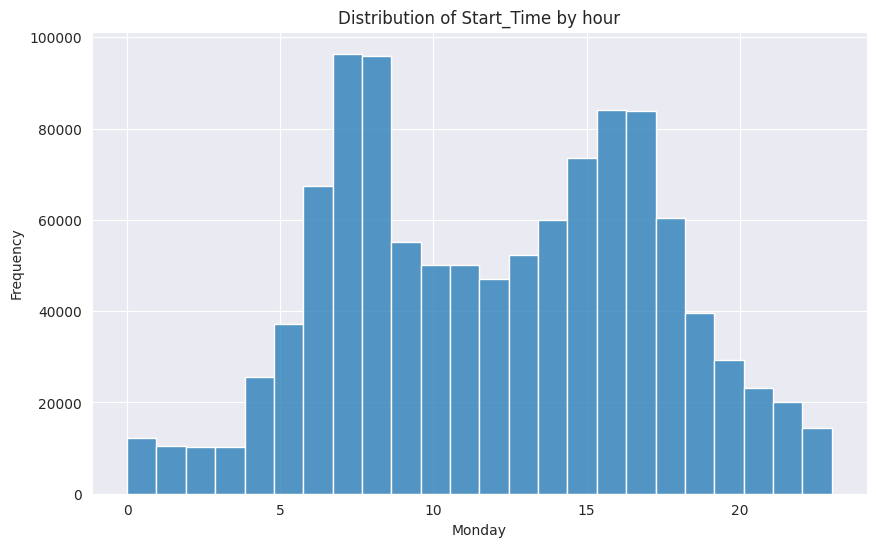

In [258]:
df['Monday'] = df.Start_Time[df['Start_Time'].dt.dayofweek==0].dt.hour

# Plotting histogram or distplot
plt.figure(figsize=(10, 6))
sns.histplot(df['Monday'], bins=24, kde=False)  # kde=True for distplot
plt.title('Distribution of Start_Time by hour')
plt.xlabel('Monday')
plt.ylabel('Frequency')
plt.show()

* On weekdays the distribution of hours for accidents is same but on weekends the distribution of hours for accidents is different 

**Which months have the most accidents?**

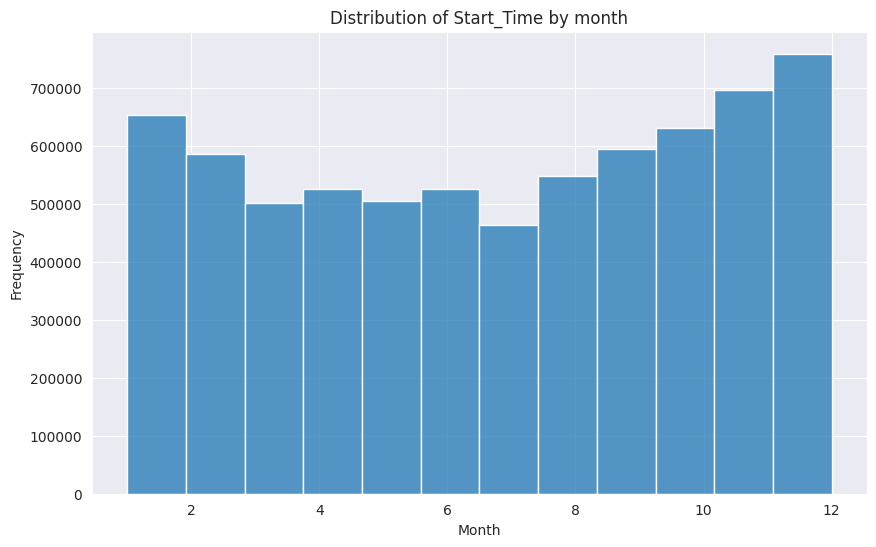

In [259]:
# Extract month from Start_Time
df['Month'] = df['Start_Time'].dt.month

# Plotting histogram or distplot
plt.figure(figsize=(10, 6))
sns.histplot(df['Month'], bins=12, kde=False)  
plt.title('Distribution of Start_Time by month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

**What is the Accidents Trend by Year?** 

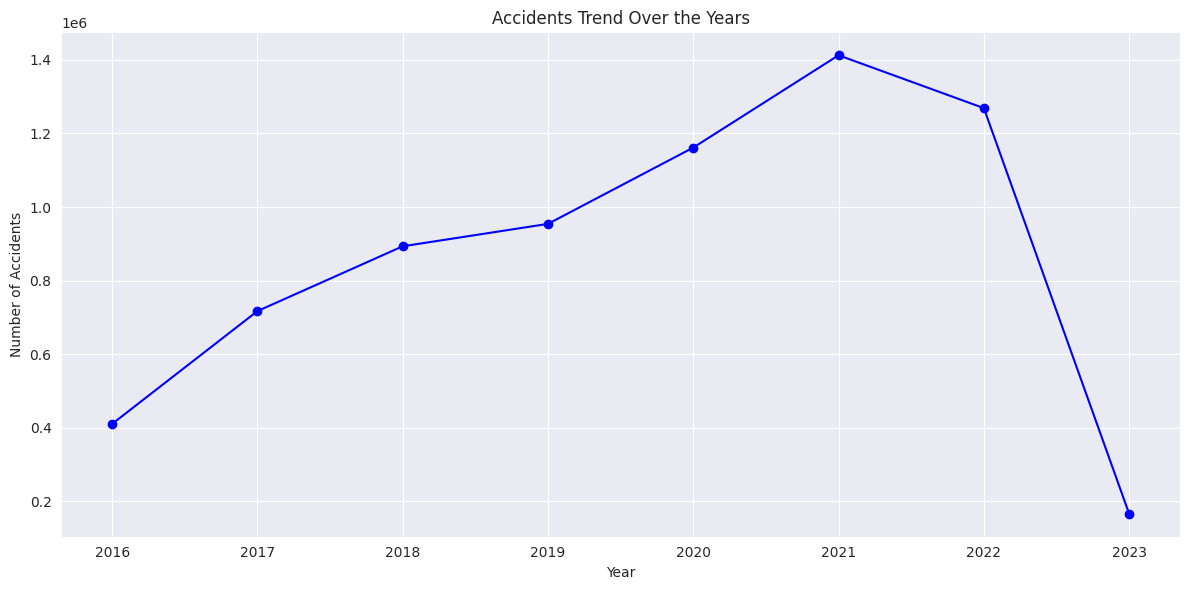

In [260]:
df['Year'] = df['Start_Time'].dt.year

# Group by year and count number of accidents
yearly_accidents = df['Year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
yearly_accidents.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Accidents Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(yearly_accidents.index)  # Ensure all years are displayed on x-axis

# Show the plot
plt.tight_layout()
plt.show()

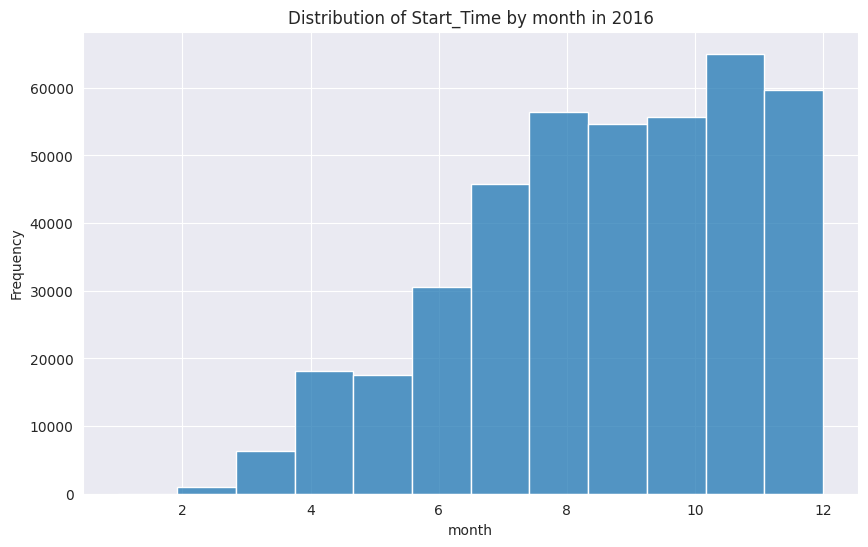

In [261]:
df['2016'] = df.Start_Time[df['Start_Time'].dt.year==2016].dt.month

# Plotting histogram or distplot
plt.figure(figsize=(10, 6))
sns.histplot(df['2016'], bins=12, kde=False)  # kde=True for distplot
plt.title('Distribution of Start_Time by month in 2016')
plt.xlabel('month')
plt.ylabel('Frequency')
plt.show()

* In 2016 year january month data is not collected

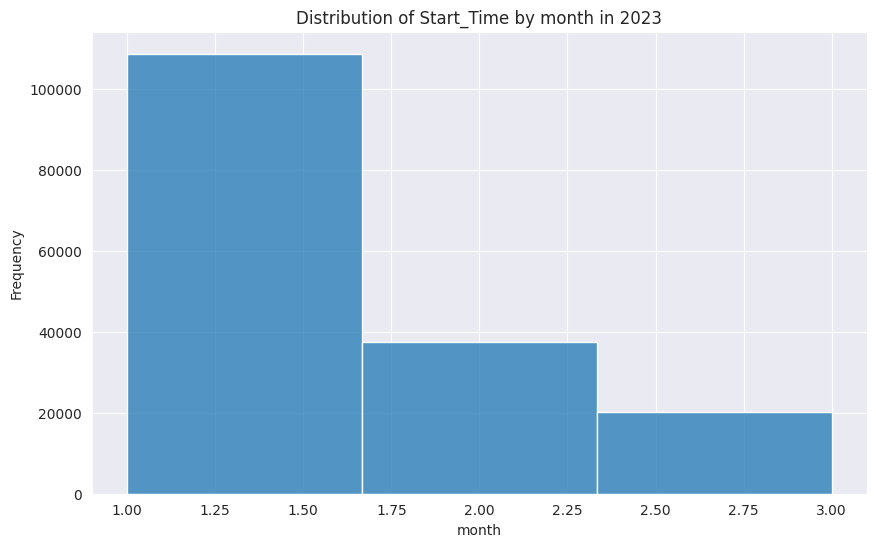

In [262]:
df['2023'] = df.Start_Time[df['Start_Time'].dt.year==2023].dt.month

# Plotting histogram or distplot
plt.figure(figsize=(10, 6))
sns.histplot(df['2023'], bins=3, kde=False)  # kde=True for distplot
plt.title('Distribution of Start_Time by month in 2023')
plt.xlabel('month')
plt.ylabel('Frequency')
plt.show()

* In 2023 only three months data is collected (Jan,Feb,Mar)

### Weather Condition

In [263]:
Weather = df.Weather_Condition.value_counts()
Weather[:20]

Weather_Condition
Fair                       2206054
Mostly Cloudy               923515
Clear                       808231
Cloudy                      715030
Partly Cloudy               635456
Overcast                    382802
Light Rain                  322207
Scattered Clouds            204782
Light Snow                  112300
Fog                          88488
Rain                         76662
Haze                         70403
Fair / Windy                 30322
Heavy Rain                   29357
Light Drizzle                21007
Thunder in the Vicinity      14834
Cloudy / Windy               14732
T-Storm                      14412
Mostly Cloudy / Windy        14156
Snow                         13290
Name: count, dtype: int64

The distribution of accidents by weather condition indicates that favorable weather conditions such as 'Fair', 'Mostly Cloudy', 'Clear', and 'Cloudy' are associated with the highest number of accidents. Conversely, adverse weather conditions like 'Light Rain', 'Fog', and 'Heavy Rain' also contribute significantly to accident rates, suggesting that both clear and inclement weather conditions can pose risks for road safety. Measures to enhance driver preparedness and adjust driving behavior based on weather conditions could help mitigate accident rates across varied weather scenarios.